In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
coloumns=list(df.columns)
coloumns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


#Exploratory Data Analysis

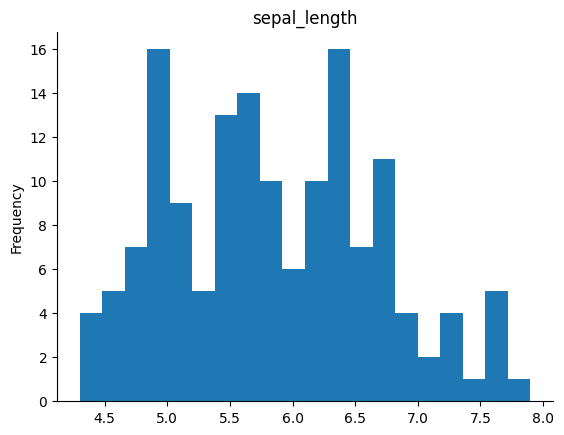

In [8]:
from matplotlib import pyplot as plt
df['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

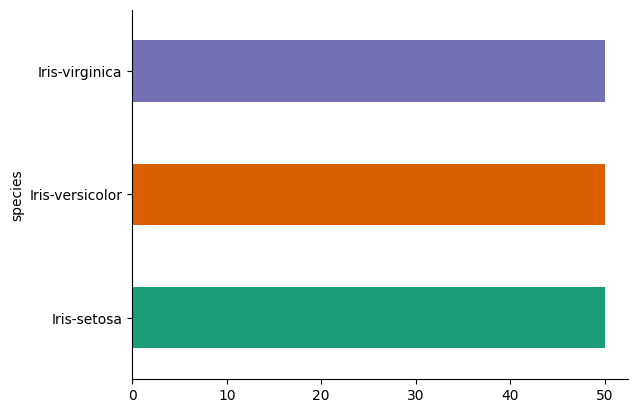

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

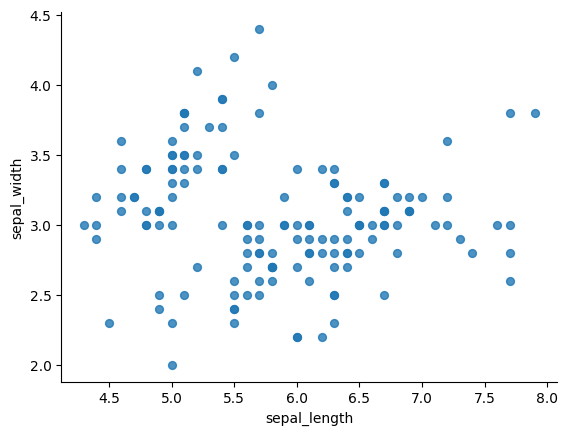

In [12]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

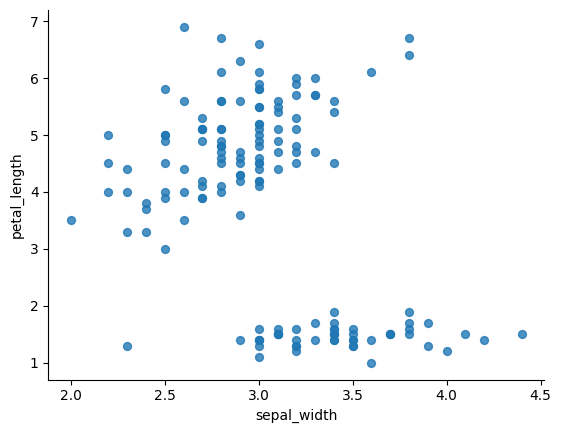

In [14]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sepal_width', y='petal_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

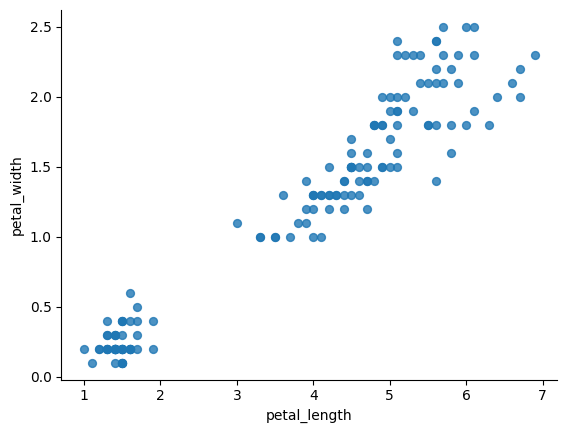

In [16]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='petal_length', y='petal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

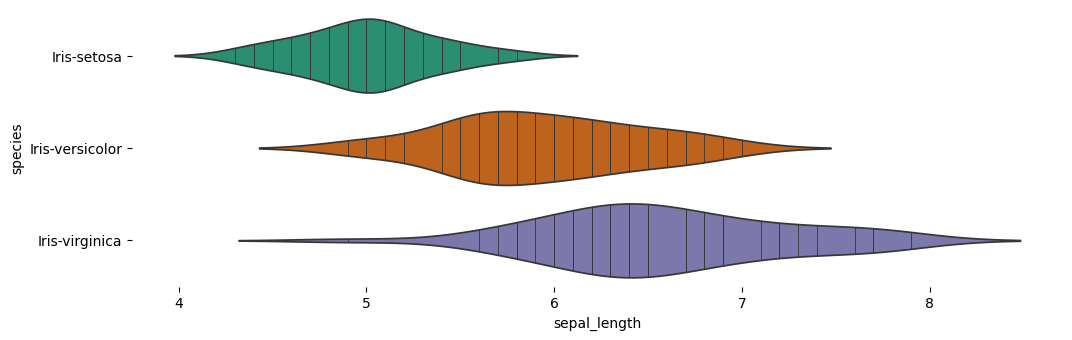

In [19]:
figsize = (12, 1.2 * len(df['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='sepal_length', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

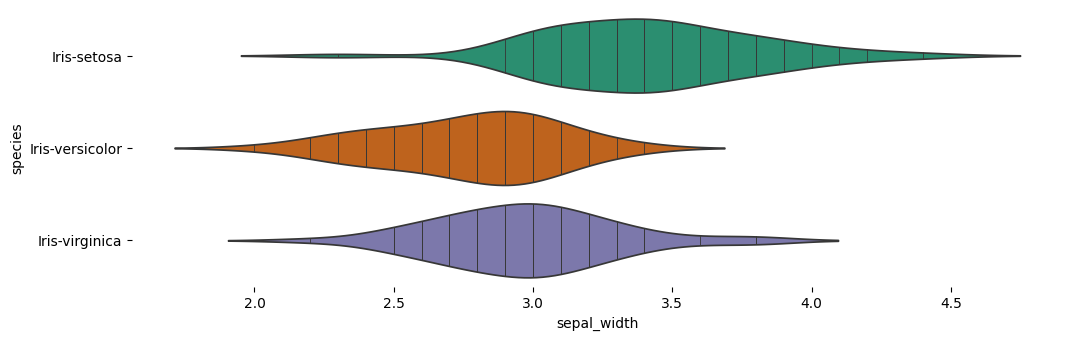

In [20]:
figsize = (12, 1.2 * len(df['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='sepal_width', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

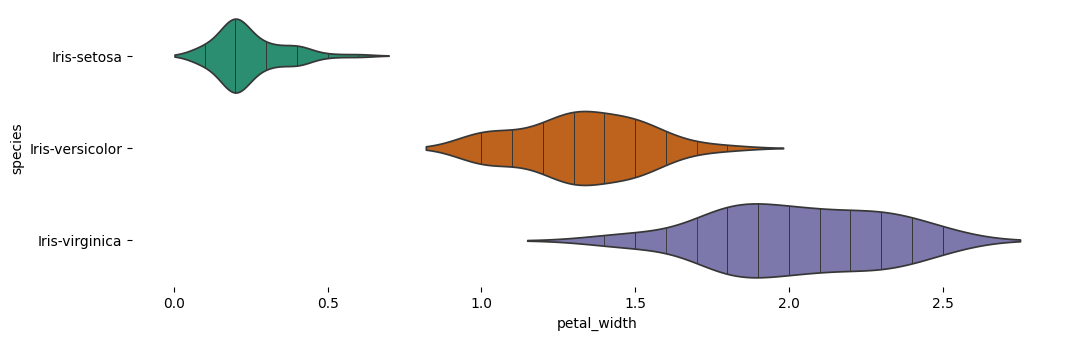

In [21]:
figsize = (12, 1.2 * len(df['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='petal_width', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     species_encoded  
0                  0  
1                  0  
2     

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length     150 non-null    float64
 1   sepal_width      150 non-null    float64
 2   petal_length     150 non-null    float64
 3   petal_width      150 non-null    float64
 4   species          150 non-null    object 
 5   species_encoded  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [27]:
columnds=list(df.columns)
columnds

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species',
 'species_encoded']

In [30]:
#setosa       0
#versicolor   1
#virginica    2

In [29]:
df['species_encoded'].unique()

array([0, 1, 2])

In [31]:
X = df.drop('species', axis=1)
y = df['species']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 100.00%

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

